# CSC-321: Data Mining and Machine Learning
# Manav Bilakhia

## Assignment 8: Challenge Problem

### Part 1: Overview

I'm giving you the [Adult Working Wage](https://archive.ics.uci.edu/ml/datasets/adult) dataset. You can find out about it at the UCI ML Repository site. 

This is the first time I'm giving you 'messy' data. That is, there is stuff missing, and formatting issues to deal with. I'm going to show you some steps you can perform to data like this.

Your job is simple, and NOT clearly defined. I want you to work with this data, and tell me a story. What can you find? What results do you get? What do they mean? What features are interesting. I'm NOT simply interested in you getting the max classification accuracy. I'm interested in what the features tell us about this data. So find ways to select, remove, or combine features, and use your machine learning skills to tell me about this data. 

The only rule is that you must treat this as a classification task, and focus on classifying the wage feature. 

If you're in any doubt, ask.

### Part 2: Data manipulation

The data IS in CSV format, but it's not called CSV. On the UCI website you'll often find data that has the .data naming convention, but really is in CSV format. There are also files called .names, and .test. The test file is a distinct test file I want YOU to use to test your work. Only report scores using this test data. This means for THIS study you DO NOT do a cross validation. This is effectively a one holdout evaluation, where I GIVE you the train and test split. This is typical for competitions and evaluation events where we want to compare performance.

Using the same test data is a great way to compare to other peoples work. I've preserved this split and you should too. Remember, anything you do to the training data, you ALSO need to do to the test data.

The [names file has a description of the data](https://github.com/nixwebb/CSV_Data/blob/master/Adult/adult.names). You might be interested to read it. 

Check out what I'm doing below. I've told you that there is missing data. Pandas is good at recognizing SOME missing feature values. In the case of this data set, missing data is indicated by the presence of a "?". You can see those if you look at the [raw version of the test data on my github account](https://raw.githubusercontent.com/nixwebb/CSV_Data/master/Adult/adult.test). This "?" isn't included in pandas default missing values, so I've added it.

I've also used the parameter *skipinitialspace=True*. If I DIDN'T, all my string values have an extra space at the beginning of them (so it wouldn't be "?", it would be " ?"), which is annoying. Pandas makes things easier, but data is dirty. Never be afraid to print out values so you can actually see them, and confirm WHAT they are exactly. DO NOT MAKE ASSUMPTIONS.


In [1]:
import pandas as pd

# Assign column names
labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','wage']
missing_values = ["?"]

# Load the training data
# I've added column headings
# I've added the missing value string
# and in order to make that work, I've skipped the initial space

adult_train = pd.read_csv("https://raw.githubusercontent.com/nixwebb/CSV_Data/master/Adult/adult.data",names=labels,na_values = missing_values,skipinitialspace=True)

pre_rows,pre_cols = adult_train.shape
print("This is the Adult wage training data set. It has", pre_rows, "instances, and it has", pre_cols, "features.\n\n")

# Show the head of the data
adult_train.head()

This is the Adult wage training data set. It has 32561 instances, and it has 15 features.




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Notice what data types the feature values are. All numeric? If not, we're going to need to deal with that. Now I'm going to load the separate test data

In [2]:
# Load the test data
# Same loading as above, but I've skipped the first row

adult_test = pd.read_csv("https://raw.githubusercontent.com/nixwebb/CSV_Data/master/Adult/adult.test",names=labels,skiprows=1,na_values=missing_values,skipinitialspace=True)
pre_test_rows,pre_test_cols = adult_test.shape


# Show the head of the data
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


First thing I want you to notice. Look at the wage column in the training data. Now look at the wage column in the test data. Notice anything...?

...

...

...

...

...

I'll wait...

...

...

...

...

...

In the training data, the class values are <=50K and >50K
In the test data, they are <=50K. and >50K. Still don't see it?

In the test data, there's an extra period after the K.

THAT is the level of headache we're dealing with, and yes we have to take care of it. If we don't then NO instance in the test data will get the right value - it'll be off by missing a period. 

It is no joke that [80% of machine learning and data mining is in data preparation](https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html). And I firmly believe that's an underestimate.

Back to our data. Removing that trailing period isn't hard. Once you know it's there.

In [3]:
adult_test['wage'] = adult_test['wage'].str.replace(r'.', '')
adult_test.head()

<ipython-input-3-50f4654a6a32>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult_test['wage'] = adult_test['wage'].str.replace(r'.', '')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


Next, see that NaN value in the workclass column, at index 4 in the test data? That's the special Not a Number symbol that pandas uses (from numpy) to represent missing data. Pandas turned the missing data from "?" into NaN, because then there are functions in pandas we can use to deal with those. 

The question is what do with do here. First, let's get a sense of the size of the problem. Visualization can help. I'm going to use the *missingno* module, to graph the missing values in the training data

<Axes: >

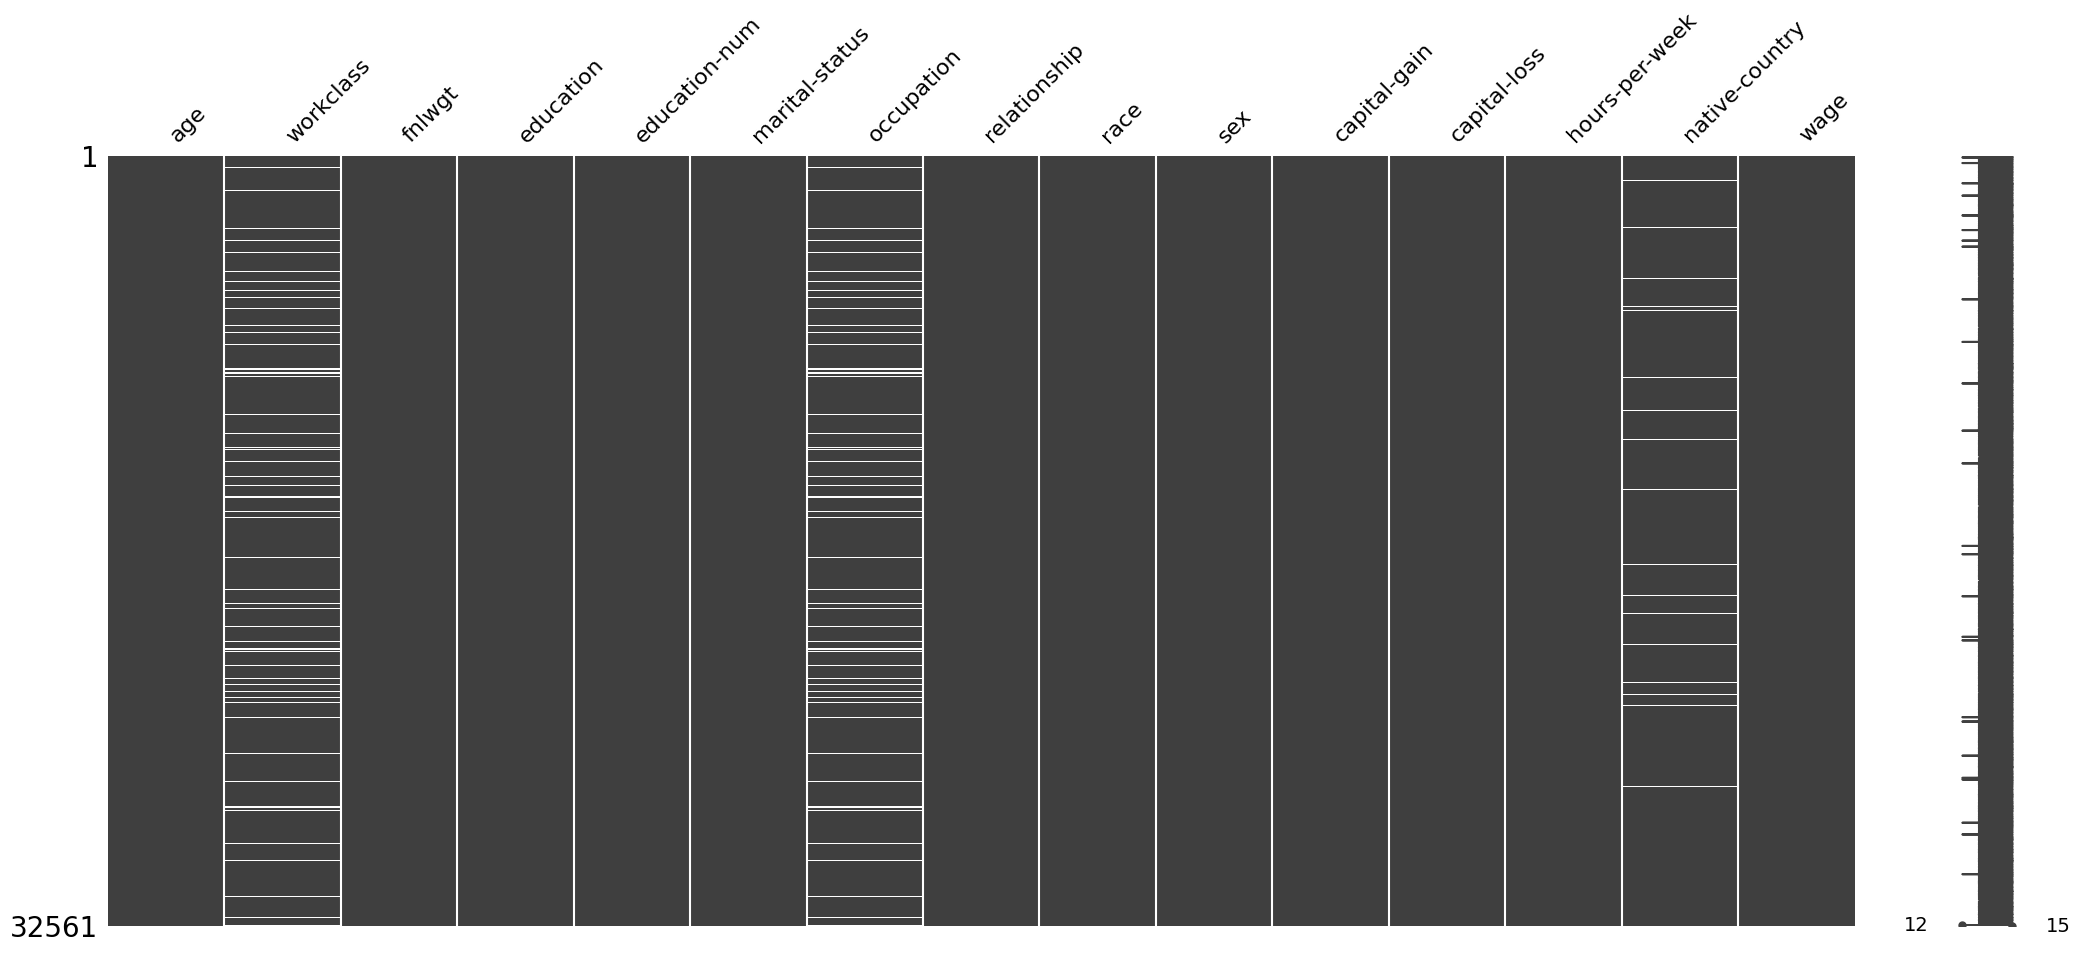

In [4]:
# Plot missing data
import missingno as msno
msno.matrix(adult_train)

You can see that the missing values (the white lines) occur in the columns workclass, occupation and native-country. There don't seem to be too many of them (this data is showing 32,561 instances), so I'm going to [DROP any instance that contains NaN](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) anywhere in that instance. Remember, if I drop them from my training data, I should ALSO drop them from my test data.

What else could I have done? I could replace NaN values in a column using an [imputer - replacing the values with a mean, or median or some constant value](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), if I didn't want to throw away instances. 



In [5]:
# Let's try dropping unknowns

print("\nDropping all instances with NaN values\n")

adult_train.dropna(inplace=True)
post_rows,post_cols = adult_train.shape
train_per = (pre_rows - post_rows) / pre_rows * 100

# I'm printing the total number of instances pre drop, post drop, and calculating the percentage dropped.

print("This is the Adult wage training data set.\nIt has",post_rows, "instances (down from",pre_rows,"), and it has", post_cols, "features (-",round(train_per,2),"%)\n\n")

adult_test.dropna(inplace=True)
post_test_rows,post_test_cols = adult_test.shape
test_per = (pre_test_rows - post_test_rows) / pre_test_rows * 100

print("This is the reduced Adult wage test data set.\nIt has", post_test_rows, "instances (down from",pre_test_rows,"), and it has", post_test_cols, "features (-",round(test_per,2),"%)\n\n")


Dropping all instances with NaN values

This is the Adult wage training data set.
It has 30162 instances (down from 32561 ), and it has 15 features (- 7.37 %)


This is the reduced Adult wage test data set.
It has 15060 instances (down from 16281 ), and it has 15 features (- 7.5 %)




Just as before, I'm going to take a look at the data. WARNING. This can be slow. I often do this once, and then comment it out, or put this part into a different, visualization notebook. You are welcome to do this, but please only submit ONE final notebook to me at the end, including all visualizations.

So what are you looking for? We have a TWO class data set. <=50k salary, and >50k. Those are colored differently below. You're looking to see if, using combinations of features, does it look like you can separate the two classes of data?

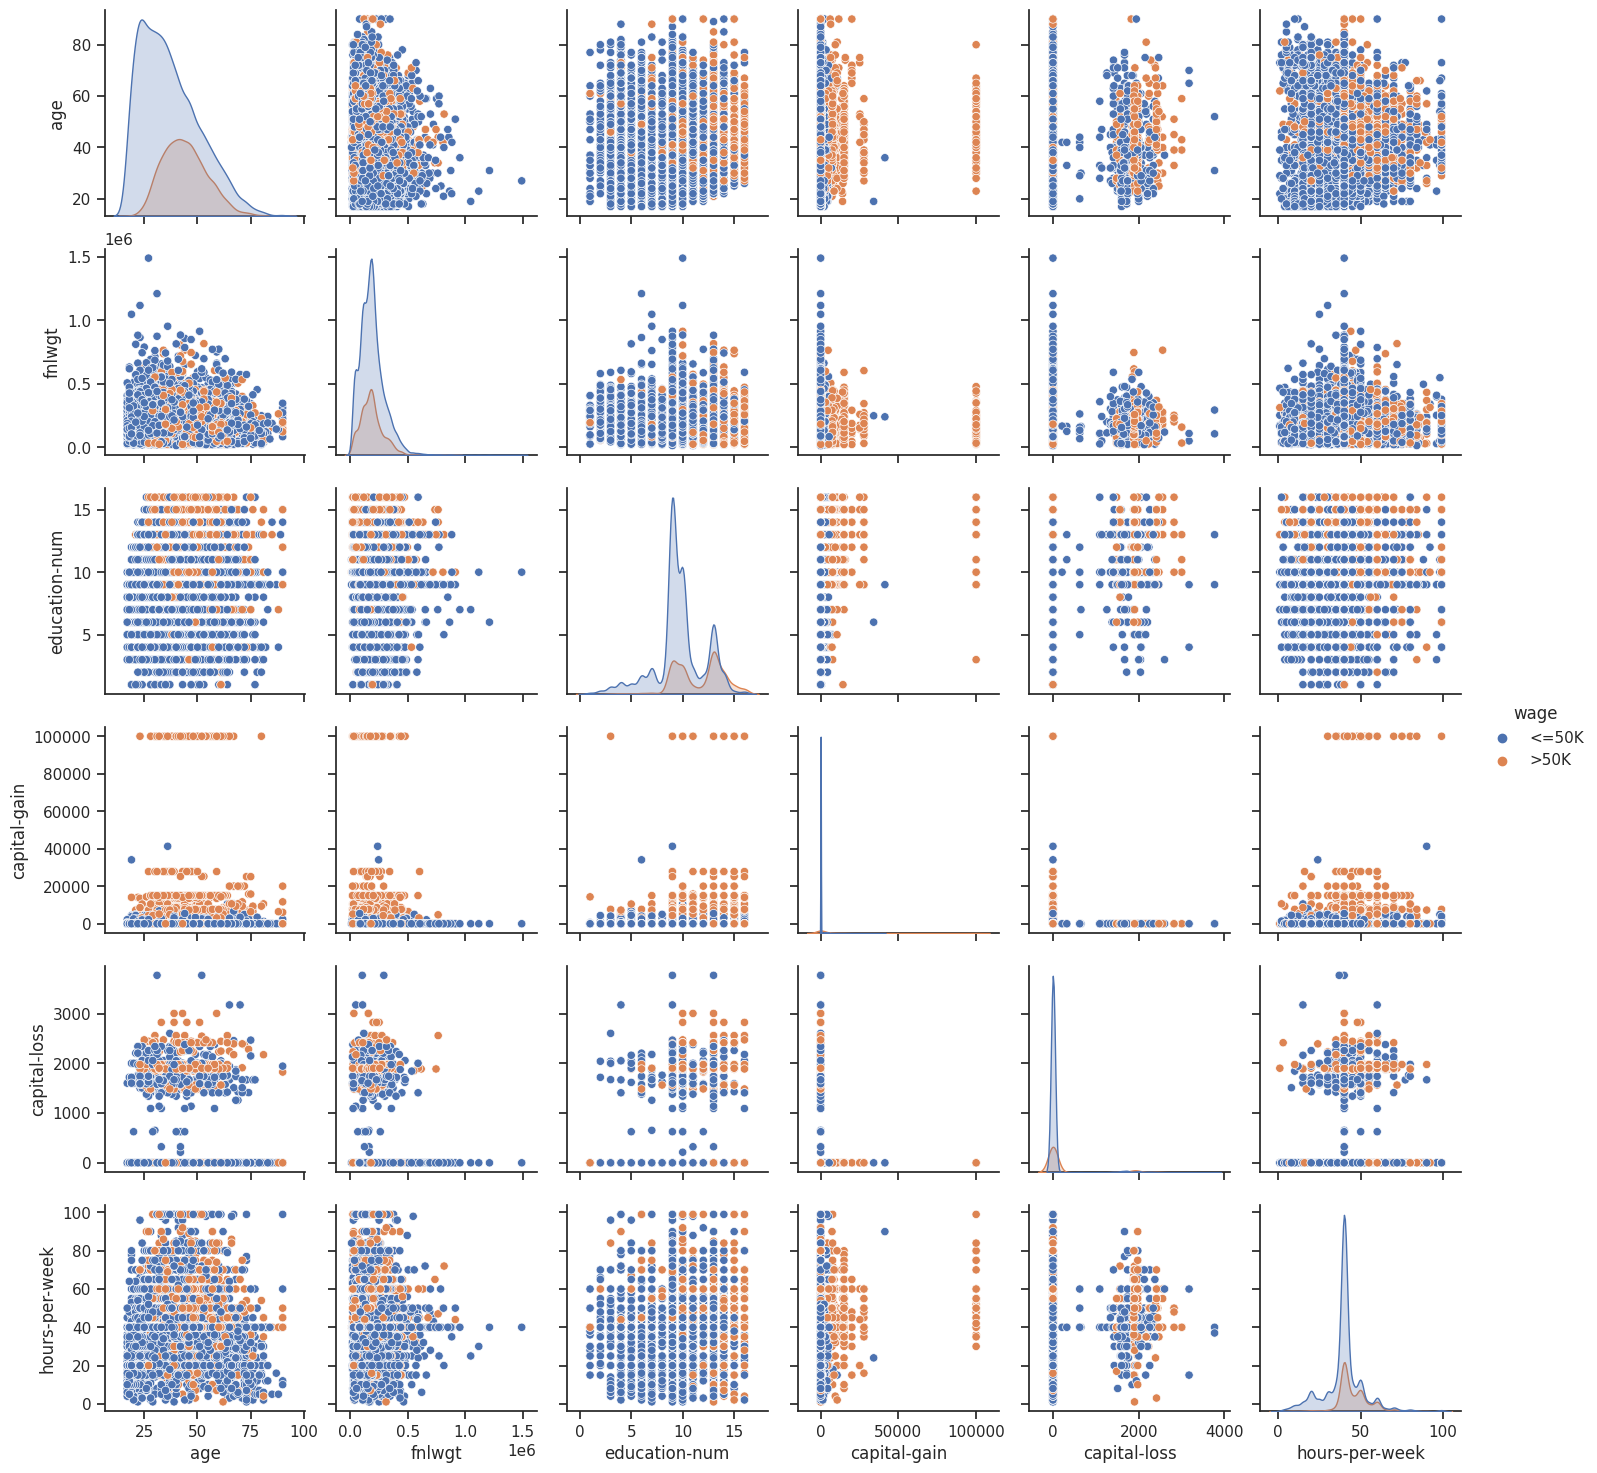

In [6]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(adult_test, hue="wage")

Earlier I asked you to be attentive to the data types of feature values. They are not all numeric. And our algorithms need numeric data, even for cateogry features. So we need to transform them TO numeric. 

We could just replace the values with numbers in the columns, but remember that can lead to undesirable behavior. If one job category is assigned a 1, and another is a 3, is that second category REALLY 3 times better than the first?

You have to ultimately decide which encoding makes SENSE for your data, and that will NOT necessarily align with the highest performance. I want you to concentrate on EXPLAINABILITY. 

Let's take a look at the feature value data types.

In [7]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  wage            30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Those objects are really all strings. This means we have a mix of nominal and numeric categories. Let's get a bit more information.

I include the 'all' value as an argument below, otherwise describe defaults to only numeric features.

In [8]:
adult_train.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Focus on the number of UNIQUE values. For instance, there are SEVEN types of workclass and FORTY ONE types of native country. As mentioned above, if we encode that as the integers 0 through 6, we're going to end up with comparisons we probably don't mean.

Both sex and wage columns have only two features. We can safely encode those as numbers, because any comparison is basically a binary choice. In fact wage we MUST define as an integer, because it's our class. 

Below, I'm using the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from sklearn to do this, first to the training data, and second to the test data. The nice thing with these encoders is that I can then apply them to any data, to transform it into the right thing, using the .transform method.

You should start to notice patterns in sklearn by now. We create an instance of a thing, and then use a fit method to fit it to data. Classifiers and regressors have a .predict method, encoders and transformers have a .transform method. 

In [9]:
from sklearn import preprocessing

# Encoding sex in the training and test data

le_sex = preprocessing.LabelEncoder()

vals = adult_train['sex'].values
le_sex.fit(vals)
adult_train['sex'] = le_sex.transform(vals)
adult_test['sex'] = le_sex.transform(adult_test['sex'])
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K


In [10]:
# Encoding wage in the training and test data

le_wage = preprocessing.LabelEncoder()
wage_vals = adult_train['wage'].values
le_wage.fit(wage_vals)
adult_train['wage'] = le_wage.transform(wage_vals)
adult_test['wage'] = le_wage.transform(adult_test['wage'].values)
adult_test.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


The other way to encode information in categories, to avoid unintentional comparison is called one-hot encoding. Below, eventually, I'm going to use the built in pandas mechanism called [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to achieve that. 

What it will do is take a column, and create NEW columns, one from each feature value in that column, making them into binary representations of that feature value. Refer back to the slides for an overview. 

HOWEVER, before we do that, I want to think about this. There will be one additional column for EACH feature value. So for a column like native-country, it will create FORTY ONE new columns. That increases dimensionality. 

Instead, **I'm** going to remove all instances where the country ISN'T United States. I'm not saying this is a good idea, or the only option. I just want to show you what you MIGHT want to do. If you want to focus on other countries or continents, you might want to do that.

To dropp the instances that are AREN'T from the USA, first I find the index of where all the NOT UNITED STATES entries are, then I drop values where that index is true. I do this INPLACE - meaning I fundamentally change the dataframe. If I want to get those other countries back, I'll have to reload the dataframe. 

THINK about memory usage here - do you NEED a new dataframe, or can you alter the existing one. Pandas provides this flexibility with a host of it's methods - look for methods that allow the INPLACE argument.

REMEMBER THIS: For your study (as with your final project), I must be able to run the notebook once, with no alterations, and NO ERRORS to get all the values, figures and graphs you want to show me.

Notice that I really do always print how many instances I now have.

In [11]:
#Get names of indexes for which column Age has value 30
indexCountry = adult_train[ adult_train['native-country'] != 'United-States' ].index
 
# Delete these row indexes from dataFrame
adult_train.drop(indexCountry , inplace=True)

usa_rows,usa_cols = adult_train.shape
usa_per = (post_rows - usa_rows) / post_rows * 100

print("This is the Adult wage training data set.\nIt has",usa_rows, "instances (down from",post_rows,"), and it has", usa_cols, "features (-",round(usa_per,2),"%)\n\n")

# Repeat to test data
indexCountry = adult_test[ adult_test['native-country'] != 'United-States' ].index
adult_test.drop(indexCountry , inplace=True)

adult_train_wage = adult_train['wage'].copy()
adult_test_wage = adult_test['wage'].copy()

adult_train.drop(['wage'],axis=1,inplace=True)
adult_test.drop(['wage'],axis=1,inplace=True)


This is the Adult wage training data set.
It has 27504 instances (down from 30162 ), and it has 15 features (- 8.81 %)




Ok, now I've dropped all but the United States entries, let's go ahead and do one-hot encoding (or adding dummy variables, as it's also called).

You might ALSO note I dropped the wage column. Why? Well, it's the one we consider the class, so personally I always LIKE that to be the last column. I'm going to drop it now and add it back in later. There's probably a better way to do it. And that's an important note.

Libraries like pandas and scikit learn are always evolving. There are DEFINITELY better ways to do things then the way I do it. I'm not setting a gold standard for DO IT USING THIS METHOD. However, WHAT we do (normalization, encoding, feature elimination) IS STANDARD. Focus on what I'm doing and not how. I DON'T use particular ways of doing things because I don't like the lack of understandability in the resulting code (lambda expressions, I'm looking at you!). You'll find better, cleaner, quicker ways if you look. 

Ok. Rant over. Take a look at the resulting data frame, and after that pay attention to the array dimensions.

In [12]:
# Get dummies
adult_train = pd.get_dummies(adult_train, prefix_sep='_', drop_first=True)
adult_test = pd.get_dummies(adult_test, prefix_sep='_', drop_first=True)

# X head
adult_train.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,37,284582,14,0,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [13]:
# Adding the wage class column back in to the data

adult_train['wage']=adult_train_wage
adult_test['wage']=adult_test_wage

final_rows,final_cols = adult_train.shape

print("This is the Adult wage training data set.\nIt has",final_rows, "instances, and it has", final_cols, "features\n\n")

adult_train.head()

This is the Adult wage training data set.
It has 27504 instances, and it has 57 features




,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,wage
0,39,77516,13,1,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,9,1,0,0,40,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,53,234721,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,37,284582,14,0,0,0,40,0,1,0,...,0,0,0,0,1,0,0,0,1,0


So here you have it. I've transformed the data into numerical values, using two different methods, labelencoding and one-hot encoding. I've eliminated instances from my data, based on missing values, or based on values I selected.

NONE of these things are set in stone. Nor do you have to do them. Or do them the way I did. They are illustrative. I'm not saying absolutely they are the right thing to do for this data.

Nor are the steps complete. What other transformations have I suggested over data? Make sure you take a look back over previous notebooks to understand what steps are typical.

I'm leaving the next steps to you. Think about the things you want to investigate using this data. Take me on a journey. Use graphs, tables and NICELY written output to do that. Take the opportunity to use text boxes to illustrate key points. 

You do NOT have to preserve the steps I did above. In fact, **delete** any text cells I created - and make your own, telling me what pre-processing steps you kept. You can copy mine substantially if it helps.

Make your notebook into a coherent one for the work you do.

I will simply reset your notebook and run it. ALL results must be generated by you, in one notebook. With ZERO errors.




Show the head of the data

In [14]:
adult_train.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,wage
0,39,77516,13,1,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,9,1,0,0,40,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,53,234721,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,37,284582,14,0,0,0,40,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Checking the dimensions of the training and test sets

In [15]:
print("Training set dimensions:", adult_train.shape)
print("Test set dimensions:", adult_test.shape)

Training set dimensions: (27504, 57)
Test set dimensions: (13788, 57)


Now that we have preprocessed our data, let's proceed to explore it and identify interesting patterns or features. To do this, we will start with some exploratory data analysis and visualization.

Importing necessary libraries

In [16]:
import matplotlib.pyplot as plt

Visualizing the distribution of the 'wage' feature

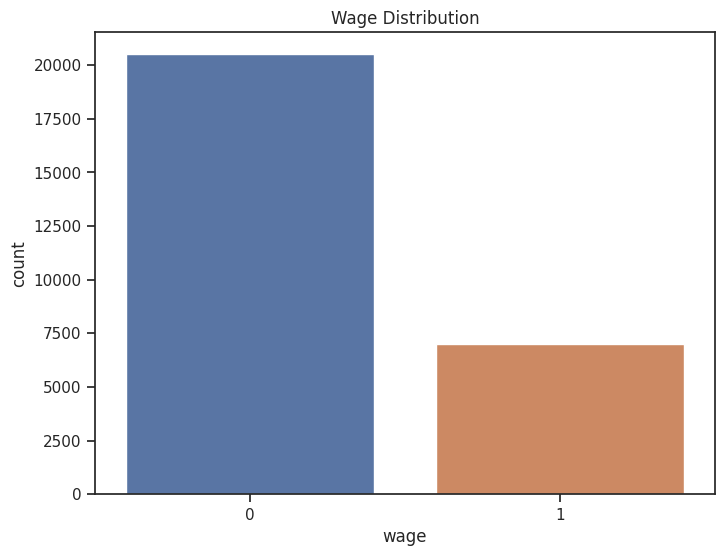

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='wage', data=adult_train)
plt.title('Wage Distribution')
plt.show()

From the above bar chart, we can see that the data is imbalanced, with a majority of instances having a wage less than or equal to 50K.

Correlation heatmap

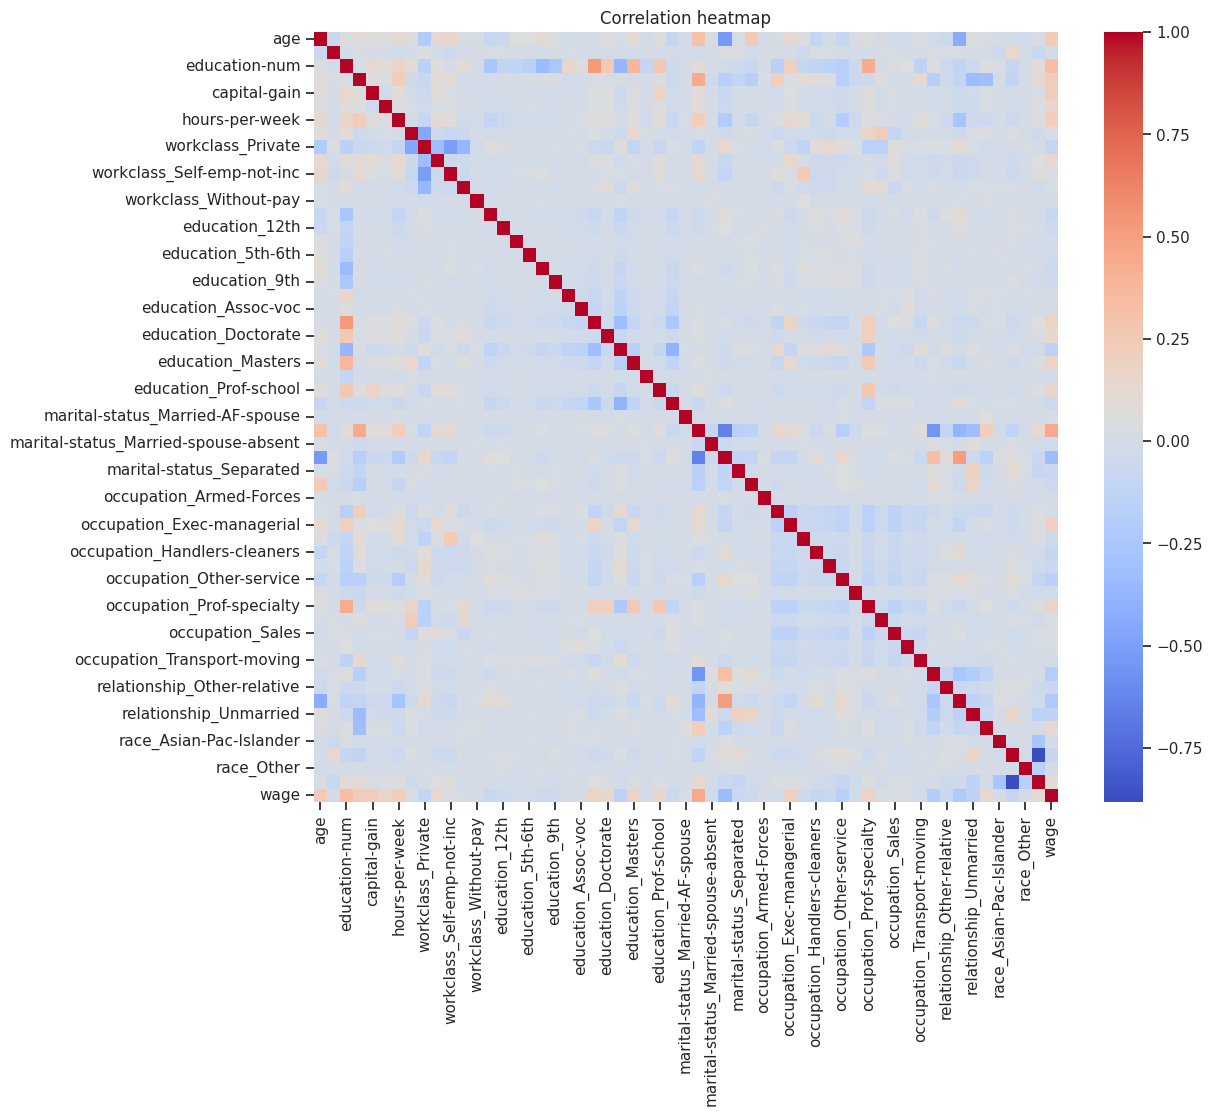

In [18]:
plt.figure(figsize=(12,10))
correlation = adult_train.corr()
sns.heatmap(correlation, cmap="coolwarm")
plt.title('Correlation heatmap')
plt.show()

The heatmap displays correlations between the features in our dataset. Higher positive correlations are shown in warmer colors, while lower (negative) correlations are shown in cooler colors. No strong correlations stand out, but we can see some weak positive correlations between some features like 'education-num' and 'hours-per-week' with the 'wage' feature.

Now, let's apply machine learning techniques to classify the wage feature. We will start by splitting the data into features and target variables and then applying different classifiers to see their performance.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Splitting the data into features and target

In [20]:
X_train = adult_train.drop('wage', axis=1)
y_train = adult_train['wage']
X_test = adult_test.drop('wage', axis=1)
y_test = adult_test['wage']

Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.802291847983754
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10335
           1       0.60      0.62      0.61      3453

    accuracy                           0.80     13788
   macro avg       0.74      0.74      0.74     13788
weighted avg       0.80      0.80      0.80     13788



Random Forest Classifier

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.8435596170583116
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10335
           1       0.72      0.62      0.66      3453

    accuracy                           0.84     13788
   macro avg       0.80      0.77      0.78     13788
weighted avg       0.84      0.84      0.84     13788



Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.7888743835219031
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10335
           1       0.71      0.27      0.39      3453

    accuracy                           0.79     13788
   macro avg       0.75      0.62      0.63     13788
weighted avg       0.77      0.79      0.75     13788



From the above results, we can see that Random Forest Classifier performs the best among the three classifiers, with the highest accuracy.

We can further analyze the feature importances using the Random Forest Classifier to get a better understanding of which features contribute the most to the classification.

Feature importances

In [24]:
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

Plot the feature importances of the Random Forest Classifier

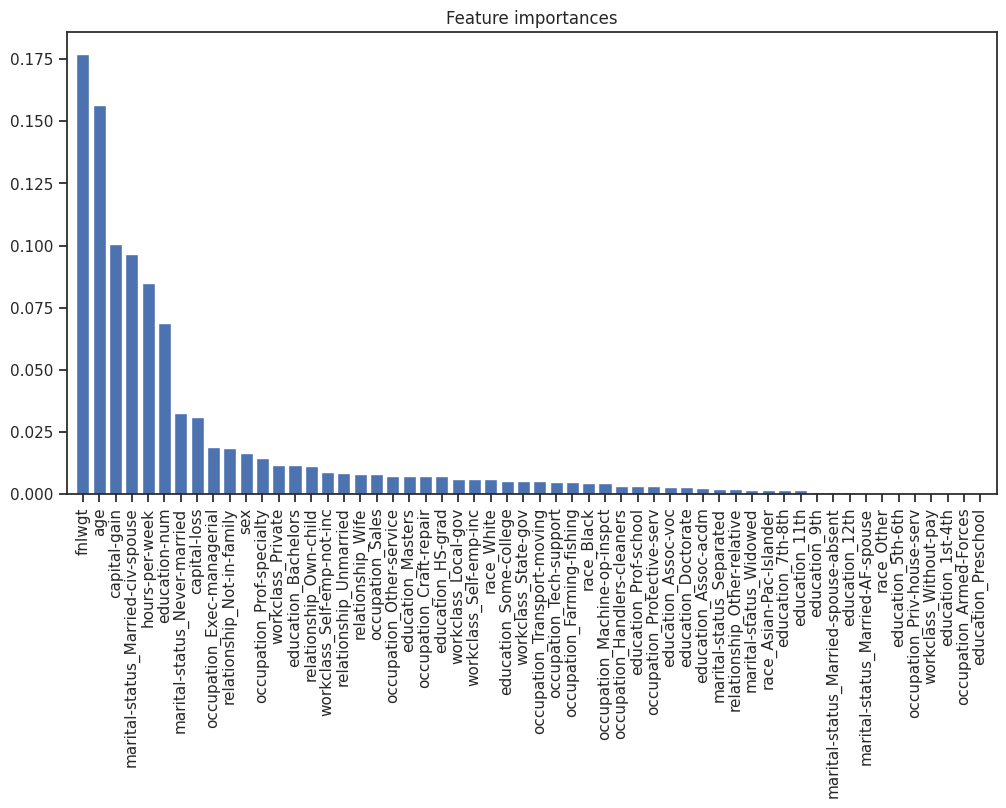

In [25]:
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

After examining the feature importances from the Random Forest classifier, we can gain insights into the factors contributing to wage classification. The next step is to further fine-tune the models and potentially improve their performance. We can use hyperparameter tuning for this purpose.

One popular method for hyperparameter tuning is Grid Search, which can be performed using the GridSearchCV class from the sklearn library. As an example, let's perform a grid search to find the optimal hyperparameters for the Random Forest classifier:

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Random Forest classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found by grid search:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found by grid search: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


The code above defines a parameter grid for the Random Forest classifier and then performs a grid search using 5-fold cross-validation. The best hyperparameters found by the grid search are printed at the end.

Now, let's use the best hyperparameters to train a new Random Forest classifier and evaluate its performance on the test set:

In [27]:
# Train a new Random Forest classifier using the best parameters
best_forest = RandomForestClassifier(**grid_search.best_params_)
best_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_forest = best_forest.predict(X_test)

# Evaluate the performance of the new Random Forest classifier
print("Random Forest with best parameters accuracy:", accuracy_score(y_test, y_pred_best_forest))
print(classification_report(y_test, y_pred_best_forest))


Random Forest with best parameters accuracy: 0.8566144473455178
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10335
           1       0.76      0.62      0.69      3453

    accuracy                           0.86     13788
   macro avg       0.82      0.78      0.80     13788
weighted avg       0.85      0.86      0.85     13788



The above code trains a new Random Forest classifier using the best hyperparameters found by the grid search, makes predictions on the test set, and evaluates its performance. Compare the performance of this new classifier to the previous models to see if there is any improvement.

Hyperparameter tuning can be performed for other classifiers as well, such as Logistic Regression and Decision Tree, to potentially improve their performance. Note that hyperparameter tuning can be computationally expensive, especially when the parameter grid is large. It's essential to strike a balance between exhaustive search and computational cost.

To evaluate the performance of the model, we can use various metrics such as accuracy, RMSE, precision, recall, and F1 score.

In [28]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_best_forest)
print("Accuracy:", accuracy)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred_best_forest, squared=False)
print("RMSE:", rmse)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_best_forest, average='weighted')
recall = recall_score(y_test, y_pred_best_forest, average='weighted')
f1 = f1_score(y_test, y_pred_best_forest, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8566144473455178
RMSE: 0.37866284826278135
Precision: 0.8511481021588351
Recall: 0.8566144473455178
F1 Score: 0.8515475458680551


Here, we are using the weighted average for precision, recall, and F1 score to account for the imbalance in the class distribution.

These evaluation metrics will provide a more comprehensive understanding of the model's performance. Keep in mind that no single metric can capture the complete picture, and it's essential to analyze multiple metrics to better understand the strengths and weaknesses of the model.